Practica Machine Learning - Airbnb Precios

## Carga Datos

In [1]:
#Separar datos de train y test

import pandas as pd
from sklearn.model_selection import train_test_split

full_df = pd.read_csv('./airbnb-listings-extract.csv', sep=';', decimal='.')
full_df.columns


Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

In [2]:
full_df.City.value_counts()

Madrid                                 13207
Barcelona                                292
London                                   132
Paris                                    108
马德里                                       52
                                       ...  
Montreal                                   1
Magaluf                                    1
Etterbeek                                  1
Windsor                                    1
Puerto Pollensa (Palma de Mallorca)        1
Name: City, Length: 246, dtype: int64

In [3]:
full_df.shape

(14780, 89)

In [4]:
full_df_Mad = full_df[full_df.City == 'Madrid']
full_df_Mad.shape

(13207, 89)

In [5]:
# Vamos a dividir en train y test. A lo largo del analisis exploratorio, sólo se va a utilizar el dato de train
# Vamos a utilizar el dataframe de sólo Madrid que hemos filtrado en los datos anteriores

train, test = train_test_split(full_df_Mad, test_size=0.2, shuffle=True, random_state=0)
print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')
train.to_csv('./train.csv', sep=';', decimal='.', index=False)
test.to_csv('./test.csv', sep=';', decimal='.', index=False)


Dimensiones del dataset de training: (10565, 89)
Dimensiones del dataset de test: (2642, 89)


In [6]:
# A partir de este momento cargamos el dataset de train y trabajamos ÚNICAMENTE con él. 
df = pd.read_csv('./train.csv', sep=';', decimal='.')

C:\Users\josu.lazaro\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (40) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Analisis exploratorio

In [7]:
df.shape
#Cómo se puede apreciar tenemos 10565 filas y 89 columnas. Vamos a ver que variables pueden ser utiles para poder calcular el precio

(10565, 89)

#Realizamos un analisis inicial para descartar variables que no nos van a servir

In [8]:
pd.options.display.max_columns=100
df.head(3)

ID                            Listing Url       Scrape ID  \
0  13270355  https://www.airbnb.com/rooms/13270355  20170407214119   
1   8991818   https://www.airbnb.com/rooms/8991818  20170407214119   
2   5310107   https://www.airbnb.com/rooms/5310107  20170407214119   

  Last Scraped                                               Name  \
0   2017-04-08                     Madrid Center Sunny Appartment   
1   2017-04-08                                    ROOMS IN MADRID   
2   2017-04-08  Attic with terrace Madrid city center -WIFI- cozy   

                                             Summary  \
0  Places of interest: CaixaForum Madrid, Barrio ...   
1  ROOMS FOR RENT IN MADRID. FOR ERASMUS STUDENS ...   
2  Attic with a marvellous terrace on top. WIFI V...   

                                               Space  \
0  Nice appartment in the center of Madrid, with ...   
1                                                NaN   
2  Home has  been reciently reformed. There plent...   

                                         Description Experiences Offered  \
0  Places of interest: CaixaForum Madrid, Barrio ...                none   
1  ROOMS FOR RENT IN MADRID. FOR ERASMUS STUDENS ...                none   
2  Attic with a marvellous terrace on top. WIFI V...                none   

                               Neighborhood Overview  \
0                                                NaN   
1                                                NaN   
2  Right in the city center of Madrid, at Barrio ...   

                                               Notes  \
0                                                NaN   
1                                                NaN   
2  I am looking forward that all my guests keep a...   

                                             Transit  \
0                                                NaN   
1                                                NaN   
2  Here you can find an interesting web of Madrid...   

                                              Access  \
0  Complete access to a fully equipped kitchen, w...   
1                                                NaN   
2  Metro: underground stations  Sol and Sevilla a...   

                                         Interaction  \
0  Will be available for you during all your stay...   
1                                                NaN   
2  We are ready to help you with any inconvenienc...   

                                         House Rules  \
0                                                NaN   
1                                                NaN   
2  We wish that our guests care for the house as ...   

                                       Thumbnail Url  \
0  https://a0.muscache.com/im/pictures/dd0c379e-1...   
1                                                NaN   
2  https://a0.muscache.com/im/pictures/66561998/c...   

                                          Medium Url  \
0  https://a0.muscache.com/im/pictures/dd0c379e-1...   
1                                                NaN   
2  https://a0.muscache.com/im/pictures/66561998/c...   

                                         Picture Url  \
0  https://public.opendatasoft.com/api/v2/catalog...   
1  https://public.opendatasoft.com/api/v2/catalog...   
2  https://public.opendatasoft.com/api/v2/catalog...   

                                      XL Picture Url   Host ID  \
0  https://a0.muscache.com/im/pictures/dd0c379e-1...  74763325   
1                                                NaN  46969485   
2  https://a0.muscache.com/im/pictures/66561998/c...  27508261   

                                     Host URL Host Name  Host Since  \
0  https://www.airbnb.com/users/show/74763325       Pau  2016-05-30   
1  https://www.airbnb.com/users/show/46969485     Ruben  2015-10-19   
2  https://www.airbnb.com/users/show/27508261    Susana  2015-02-10   

                        Host Location  \
0  Madrid, Community of Madrid, Spain   
1                                  ES  

In [9]:
df.columns

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

In [10]:
pd.options.display.max_rows=100
df.dtypes

ID                                  int64
Listing Url                        object
Scrape ID                           int64
Last Scraped                       object
Name                               object
Summary                            object
Space                              object
Description                        object
Experiences Offered                object
Neighborhood Overview              object
Notes                              object
Transit                            object
Access                             object
Interaction                        object
House Rules                        object
Thumbnail Url                      object
Medium Url                         object
Picture Url                        object
XL Picture Url                     object
Host ID                             int64
Host URL                           object
Host Name                          object
Host Since                         object
Host Location                     

In [11]:
#Vamos a realizar la primera selección de columnas. Para ello se evalúa el tipo de cada variable y el contenido que tiene. Se ve claramente
#cómo las variables que contienen Ids, Urls no nos van a aportar nada para predecir el precio. Por otro lado, las variables que contienen
#texto que no son categóricas no nos van a servir en este caso, pero podrían resultar muy útiles aplicando nlp ya que
#podrían contener información que se podría transformar a nuevas columnas que pueden ayudar a predecir mejor el precio. Por ejemplo,
#ejemplo, en summary dentro del texto, se puede sacar una variable que tiene terraza, o es ático, que puede influir en el precio.

In [12]:
#Seleccionamos el primer conjunto de variables

variables_selec= ["Neighbourhood","Neighbourhood Cleansed","Neighbourhood Group Cleansed","Zipcode","Property Type","Room Type",
               "Accommodates","Bathrooms","Bedrooms","Beds","Bed Type","Amenities","Square Feet","Price","Weekly Price",
               "Monthly Price","Security Deposit","Cleaning Fee","Guests Included","Extra People","Minimum Nights",
               "Maximum Nights","Number of Reviews","First Review","Last Review","Review Scores Rating","Review Scores Accuracy",
               "Review Scores Cleanliness","Review Scores Checkin","Review Scores Communication","Review Scores Location",
               "Review Scores Value","Cancellation Policy","Reviews per Month"]

df_seleccion=df.loc[:,variables_selec]
df_seleccion.shape

(10565, 34)

In [13]:
#Vamos a ver las distribuciones de las variables: numericas y categóricas
df_seleccion.head()

Neighbourhood Neighbourhood Cleansed Neighbourhood Group Cleansed Zipcode  \
0           NaN            Embajadores                       Centro     NaN   
1           NaN                 Ventas                Ciudad Lineal   28017   
2        Cortes                 Cortes                       Centro   28014   
3           Sol                    Sol                       Centro   28013   
4      Pacifico               Pacífico                       Retiro   28007   

  Property Type        Room Type  Accommodates  Bathrooms  Bedrooms  Beds  \
0     Apartment  Entire home/apt             4        1.0       1.0   1.0   
1         House     Private room             1        1.0       1.0   1.0   
2     Apartment  Entire home/apt             4        1.0       2.0   4.0   
3     Apartment  Entire home/apt             2        1.0       0.0   1.0   
4     Apartment     Private room             2        2.0       1.0   1.0   

   Bed Type                                          Amenities  Square Feet  \
0  Real Bed  TV,Cable TV,Wireless Internet,Kitchen,Smoking ...          NaN   
1  Real Bed  TV,Internet,Wireless Internet,Kitchen,Free par...          NaN   
2  Real Bed  TV,Internet,Wireless Internet,Air conditioning...          NaN   
3  Real Bed  TV,Internet,Wireless Internet,Air conditioning...          NaN   
4  Real Bed  TV,Wireless Internet,Air conditioning,Kitchen,...          NaN   

   Price  Weekly Price  Monthly Price  Security Deposit  Cleaning Fee  \
0   55.0           NaN            NaN               NaN           NaN   
1   21.0         170.0          410.0               NaN           NaN   
2  110.0         800.0            NaN             175.0          50.0   
3   39.0           NaN            NaN               NaN           NaN   
4  500.0           NaN            NaN               NaN           NaN   

   Guests Included  Extra People  Minimum Nights  Maximum Nights  \
0                1             0               1            1125   
1                1             0               1            1125   
2                4            15               2            1125   
3                1             0               2             365   
4                1             0               1            1125   

   Number of Reviews First Review Last Review  Review Scores Rating  \
0                 72   2016-06-30  2017-04-02                  88.0   
1                  0          NaN         NaN                   NaN   
2                 58   2015-03-08  2017-03-20                  93.0   
3                 11   2016-12-19  2017-04-02                  87.0   
4                  1   2016-06-14  2016-06-14                   NaN   

   Review Scores Accuracy  Review Scores Cleanliness  Review Scores Checkin  \
0                     9.0                        8.0                   10.0   
1                     NaN                        NaN                    NaN   
2                     9.0                       10.0                   10.0   
3                     8.0                        8.0                    9.0   
4                     NaN                        NaN                    NaN   

   Review Scores Communication  Review Scores Location  Review Scores Value  \
0                         10.0                     9.0                  9.0   
1                          NaN                     NaN                  NaN   
2                         10.0                    10.0                  9.0   
3                          9.0                    10.0                  9.0   
4                          NaN                     NaN                  NaN   

  Cancellation Policy  Reviews per Month  
0            flexible               7.63  
1            flexible                NaN  
2            moderate               2.28  
3            moderate               2.97  
4            flexible               0.10

In [14]:
#Vamos a analizar las variables, mediante el describe para las numéricas
df_seleccion.describe()

Accommodates     Bathrooms      Bedrooms          Beds  Square Feet  \
count  10565.000000  10523.000000  10545.000000  10522.000000   427.000000   
mean       3.182773      1.253587      1.293789      1.981753   374.084309   
std        1.986991      0.603839      0.832743      1.509860   520.539060   
min        1.000000      0.000000      0.000000      1.000000     0.000000   
25%        2.000000      1.000000      1.000000      1.000000     0.000000   
50%        2.000000      1.000000      1.000000      1.000000   108.000000   
75%        4.000000      1.000000      2.000000      2.000000   646.000000   
max       16.000000      8.000000     10.000000     16.000000  2691.000000   

              Price  Weekly Price  Monthly Price  Security Deposit  \
count  10558.000000   2676.000000    2634.000000       4479.000000   
mean      65.771832    369.848655    1356.934700        182.905336   
std       56.347456    190.904123    1021.055693        107.433671   
min        9.000000     70.000000     250.000000         70.000000   
25%       31.000000    210.000000     700.000000        100.000000   
50%       52.000000    350.000000    1200.000000        150.000000   
75%       80.000000    490.000000    1690.000000        200.000000   
max      875.000000    999.000000   25000.000000        990.000000   

       Cleaning Fee  Guests Included  Extra People  Minimum Nights  \
count   6256.000000     10565.000000  10565.000000    10565.000000   
mean      29.535166         1.568102      7.403691        3.014576   
std       25.960698         1.080018     11.145815       13.923215   
min        4.000000         1.000000      0.000000        1.000000   
25%       15.000000         1.000000      0.000000        1.000000   
50%       25.000000         1.000000      0.000000        2.000000   
75%       35.000000         2.000000     14.000000        3.000000   
max      500.000000        16.000000    276.000000     1125.000000   

       Maximum Nights  Number of Reviews  Review Scores Rating  \
count    10565.000000       10565.000000           8276.000000   
mean       867.373971          22.973213             91.609836   
std       1503.100709          38.299584              8.964766   
min          1.000000           0.000000             20.000000   
25%        365.000000           1.000000             88.000000   
50%       1125.000000           7.000000             94.000000   
75%       1125.000000          28.000000             98.000000   
max      99999.000000         446.000000            100.000000   

       Review Scores Accuracy  Review Scores Cleanliness  \
count             8261.000000                8267.000000   
mean                 9.408667                   9.321761   
std                  0.919281                   1.002906   
min                  2.000000                   2.000000   
25%                  9.000000                   9.000000   
50%                 10.000000                  10.000000   
75%                 10.000000                  10.000000   
max                 10.000000                  10.000000   

       Review Scores Checkin  Review Scores Communication  \
count            8252.000000                  8266.000000   
mean                9.618396                     9.644447   
std                 0.796256                     0.754741   
min                 2.000000                     2.000000   
25%                 9.000000                     9.000000   
50%                10.000000                    10.000000   
75%                10.000000                    10.000000   
max                10.000000                    10.000000   

       Review Scores Location  Review Scores Value  Reviews per Month  
count             8250.000000          8250.000000        8378.000000  
mean                 9.543273             9.209818           1.934709  
std                  0.764329             0.954905           1.905633  
min                  2.000000             2.000000           0.02000

In [15]:
#La variable price tiene 7 registros sin informar. Los eliminamos
df_seleccion.dropna(subset=['Price'],inplace=True)
df_seleccion.describe()

Accommodates     Bathrooms      Bedrooms          Beds  Square Feet  \
count  10558.000000  10517.000000  10538.000000  10516.000000   426.000000   
mean       3.181474      1.252781      1.293225      1.981076   370.793427   
std        1.985938      0.601699      0.832227      1.508613   516.684835   
min        1.000000      0.000000      0.000000      1.000000     0.000000   
25%        2.000000      1.000000      1.000000      1.000000     0.000000   
50%        2.000000      1.000000      1.000000      1.000000   104.000000   
75%        4.000000      1.000000      2.000000      2.000000   646.000000   
max       16.000000      8.000000     10.000000     16.000000  2691.000000   

              Price  Weekly Price  Monthly Price  Security Deposit  \
count  10558.000000   2674.000000    2631.000000       4478.000000   
mean      65.771832    369.444652    1355.569365        182.923850   
std       56.347456    190.402692    1020.694875        107.438523   
min        9.000000     70.000000     250.000000         70.000000   
25%       31.000000    210.000000     700.000000        100.000000   
50%       52.000000    350.000000    1200.000000        150.000000   
75%       80.000000    490.000000    1680.000000        200.000000   
max      875.000000    999.000000   25000.000000        990.000000   

       Cleaning Fee  Guests Included  Extra People  Minimum Nights  \
count   6253.000000     10558.000000  10558.000000    10558.000000   
mean      29.514953         1.568384      7.359348        3.015060   
std       25.935664         1.080282     10.636656       13.927744   
min        4.000000         1.000000      0.000000        1.000000   
25%       15.000000         1.000000      0.000000        1.000000   
50%       25.000000         1.000000      0.000000        2.000000   
75%       35.000000         2.000000     14.000000        3.000000   
max      500.000000        16.000000    276.000000     1125.000000   

       Maximum Nights  Number of Reviews  Review Scores Rating  \
count    10558.000000       10558.000000           8275.000000   
mean       867.380280          22.988066             91.611239   
std       1503.557666          38.307917              8.964399   
min          1.000000           0.000000             20.000000   
25%        365.000000           1.000000             88.000000   
50%       1125.000000           7.000000             94.000000   
75%       1125.000000          28.000000             98.000000   
max      99999.000000         446.000000            100.000000   

       Review Scores Accuracy  Review Scores Cleanliness  \
count             8260.000000                8266.000000   
mean                 9.408717                   9.321800   
std                  0.919326                   1.002961   
min                  2.000000                   2.000000   
25%                  9.000000                   9.000000   
50%                 10.000000                  10.000000   
75%                 10.000000                  10.000000   
max                 10.000000                  10.000000   

       Review Scores Checkin  Review Scores Communication  \
count            8251.000000                  8265.000000   
mean                9.618713                     9.644888   
std                 0.795782                     0.753722   
min                 2.000000                     2.000000   
25%                 9.000000                     9.000000   
50%                10.000000                    10.000000   
75%                10.000000                    10.000000   
max                10.000000                    10.000000   

       Review Scores Location  Review Scores Value  Reviews per Month  
count             8249.000000          8249.000000        8377.000000  
mean                 9.543460             9.209844           1.934905  
std                  0.764186             0.954961           1.905662  
min                  2.000000             2.000000           0.02000

In [16]:
# Las variables principales cómo bathrooms, bedrooms o beds tienen algun nulo. Teniendo en cuenta que los valores nulos 
#son tan pequeños. Vamos a eliminar esos registros.

df_seleccion.dropna(subset=['Bathrooms'],inplace=True)
df_seleccion.dropna(subset=['Bedrooms'],inplace=True)
df_seleccion.dropna(subset=['Beds'],inplace=True)

df_seleccion.describe()

Accommodates     Bathrooms      Bedrooms          Beds  Square Feet  \
count  10487.000000  10487.000000  10487.000000  10487.000000   416.000000   
mean       3.186135      1.252169      1.293697      1.982073   375.985577   
std        1.985708      0.596927      0.833188      1.509732   520.383853   
min        1.000000      0.000000      0.000000      1.000000     0.000000   
25%        2.000000      1.000000      1.000000      1.000000     0.000000   
50%        2.000000      1.000000      1.000000      1.000000   108.000000   
75%        4.000000      1.000000      2.000000      2.000000   646.000000   
max       16.000000      8.000000     10.000000     16.000000  2691.000000   

              Price  Weekly Price  Monthly Price  Security Deposit  \
count  10487.000000   2650.000000    2607.000000       4463.000000   
mean      65.776771    369.696226    1358.501726        182.939951   
std       56.321475    190.585001    1021.675867        107.503438   
min        9.000000     70.000000     250.000000         70.000000   
25%       31.000000    210.000000     700.000000        100.000000   
50%       52.000000    350.000000    1200.000000        150.000000   
75%       80.000000    490.000000    1695.000000        200.000000   
max      875.000000    999.000000   25000.000000        990.000000   

       Cleaning Fee  Guests Included  Extra People  Minimum Nights  \
count   6227.000000     10487.000000  10487.000000    10487.000000   
mean      29.535571         1.570611      7.370554        3.022027   
std       25.924229         1.081879     10.654761       13.973907   
min        4.000000         1.000000      0.000000        1.000000   
25%       15.000000         1.000000      0.000000        1.000000   
50%       25.000000         1.000000      0.000000        2.000000   
75%       35.000000         2.000000     14.000000        3.000000   
max      500.000000        16.000000    276.000000     1125.000000   

       Maximum Nights  Number of Reviews  Review Scores Rating  \
count    10487.000000       10487.000000           8233.000000   
mean       867.709068          22.981501             91.624317   
std       1508.170463          38.089050              8.954188   
min          1.000000           0.000000             20.000000   
25%        365.000000           1.000000             88.000000   
50%       1125.000000           7.000000             94.000000   
75%       1125.000000          28.000000             98.000000   
max      99999.000000         446.000000            100.000000   

       Review Scores Accuracy  Review Scores Cleanliness  \
count             8218.000000                8224.000000   
mean                 9.410319                   9.323200   
std                  0.916656                   1.001818   
min                  2.000000                   2.000000   
25%                  9.000000                   9.000000   
50%                 10.000000                  10.000000   
75%                 10.000000                  10.000000   
max                 10.000000                  10.000000   

       Review Scores Checkin  Review Scores Communication  \
count            8209.000000                  8223.000000   
mean                9.619808                     9.646723   
std                 0.791834                     0.749826   
min                 2.000000                     2.000000   
25%                 9.000000                     9.000000   
50%                10.000000                    10.000000   
75%                10.000000                    10.000000   
max                10.000000                    10.000000   

       Review Scores Location  Review Scores Value  Reviews per Month  
count             8207.000000          8207.000000        8334.000000  
mean                 9.543926             9.212380           1.937502  
std                  0.763689             0.951468           1.905323  
min                  2.000000             2.000000           0.02000

In [17]:
#Analizando los datos estadísticos proporcionados por el describe vemos lo siguiente:

#-Teniendo en cuenta el alto % de nulos que tienen se eliminan estas variables:
    #-Square Feet, Weekly price y monthly price
    
df_seleccion.drop(['Square Feet','Weekly Price','Monthly Price'],axis=1,inplace=True)    

In [18]:
#-En las variables Security Deposit y Cleaning Fee, vamos a tener en cuenta que el nulo equivale a 0, cómo que no tiene
#ni tarifa de limpieza ni deposito de seguridad.
#Aplicamos el fill rellenando con 0s.

df_seleccion['Security Deposit'].fillna(0, inplace=True)
df_seleccion['Cleaning Fee'].fillna(0, inplace=True)


In [106]:
#-En las referentes al rating completaremos con la media
#Aplicamos el fill con la media
    

#rellenamos las variables de ReviewScore con la media de la valoración

features_to_fill = ["Review Scores Rating", "Review Scores Accuracy", 'Review Scores Cleanliness',
                   'Review Scores Cleanliness','Review Scores Checkin','Review Scores Communication',
                    'Review Scores Location','Review Scores Value','Reviews per Month']
map_of_values_reviews = {}
   
for f in features_to_fill:
    media = df_seleccion[f].mean()
    map_of_values_reviews[f] = media
    df_seleccion[f].fillna(media,inplace=True)


In [89]:
#Hay variables que tienen un  % sin informar que vamos a completar

df_seleccion['Review Scores Rating'].fillna(df_seleccion['Review Scores Rating'].mean(), inplace=True)
df_seleccion['Review Scores Accuracy'].fillna(df_seleccion['Review Scores Accuracy'].mean(), inplace=True)
df_seleccion['Review Scores Cleanliness'].fillna(df_seleccion['Review Scores Cleanliness'].mean(), inplace=True)
df_seleccion['Review Scores Checkin'].fillna(df_seleccion['Review Scores Checkin'].mean(), inplace=True)
df_seleccion['Review Scores Communication'].fillna(df_seleccion['Review Scores Communication'].mean(), inplace=True)
df_seleccion['Review Scores Location'].fillna(df_seleccion['Review Scores Location'].mean(), inplace=True)
df_seleccion['Review Scores Location'].fillna(df_seleccion['Review Scores Location'].mean(), inplace=True)
df_seleccion['Review Scores Value'].fillna(df_seleccion['Review Scores Value'].mean(), inplace=True)
df_seleccion['Reviews per Month'].fillna(df_seleccion['Reviews per Month'].mean(), inplace=True)

In [107]:
#Analizamos las variables categóricas
df_seleccion.describe()

Accommodates     Bathrooms      Bedrooms          Beds         Price  \
count  10487.000000  10487.000000  10487.000000  10487.000000  10487.000000   
mean       3.186135      1.252169      1.293697      1.982073     65.776771   
std        1.985708      0.596927      0.833188      1.509732     56.321475   
min        1.000000      0.000000      0.000000      1.000000      9.000000   
25%        2.000000      1.000000      1.000000      1.000000     31.000000   
50%        2.000000      1.000000      1.000000      1.000000     52.000000   
75%        4.000000      1.000000      2.000000      2.000000     80.000000   
max       16.000000      8.000000     10.000000     16.000000    875.000000   

       Security Deposit  Cleaning Fee  Guests Included  Extra People  \
count      10487.000000  10487.000000     10487.000000  10487.000000   
mean          77.854582     17.537713         1.570611      7.370554   
std          114.454728     24.687447         1.081879     10.654761   
min            0.000000      0.000000         1.000000      0.000000   
25%            0.000000      0.000000         1.000000      0.000000   
50%            0.000000     10.000000         1.000000      0.000000   
75%          150.000000     30.000000         2.000000     14.000000   
max          990.000000    500.000000        16.000000    276.000000   

       Minimum Nights  Maximum Nights  Number of Reviews  \
count    10487.000000    10487.000000       10487.000000   
mean         3.022027      867.709068          22.981501   
std         13.973907     1508.170463          38.089050   
min          1.000000        1.000000           0.000000   
25%          1.000000      365.000000           1.000000   
50%          2.000000     1125.000000           7.000000   
75%          3.000000     1125.000000          28.000000   
max       1125.000000    99999.000000         446.000000   

       Review Scores Rating  Review Scores Accuracy  \
count          10487.000000            10487.000000   
mean              91.624317                9.410319   
std                7.933667                0.811443   
min               20.000000                2.000000   
25%               90.000000                9.000000   
50%               91.624317                9.410319   
75%               97.000000               10.000000   
max              100.000000               10.000000   

       Review Scores Cleanliness  Review Scores Checkin  \
count               10487.000000           10487.000000   
mean                    9.323200               9.619808   
std                     0.887154               0.700564   
min                     2.000000               2.000000   
25%                     9.000000               9.619808   
50%                     9.323200              10.000000   
75%                    10.000000              10.000000   
max                    10.000000              10.000000   

       Review Scores Communication  Review Scores Location  \
count                 10487.000000            10487.000000   
mean                      9.646723                9.543926   
std                       0.663964                0.675581   
min                       2.000000                2.000000   
25%                       9.646723                9.000000   
50%                      10.000000               10.000000   
75%                      10.000000               10.000000   
max                      10.000000               10.000000   

       Review Scores Value  Reviews per Month  
count         10487.000000       10487.000000  
mean              9.212380           1.937502  
std               0.841696           1.698496  
min               2.000000           0.020000  
25%               9.000000           0.640000  
50%               9.212380           1.937502  
75%              10.000000           2.360000  
max              10.000000          17.210000

C:\Users\josu.lazaro\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\josu.lazaro\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\josu.lazaro\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\josu.lazaro\AppData\Local\Continuum\anaconda3\li

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C328FF1EC8>,
      dtype=object)

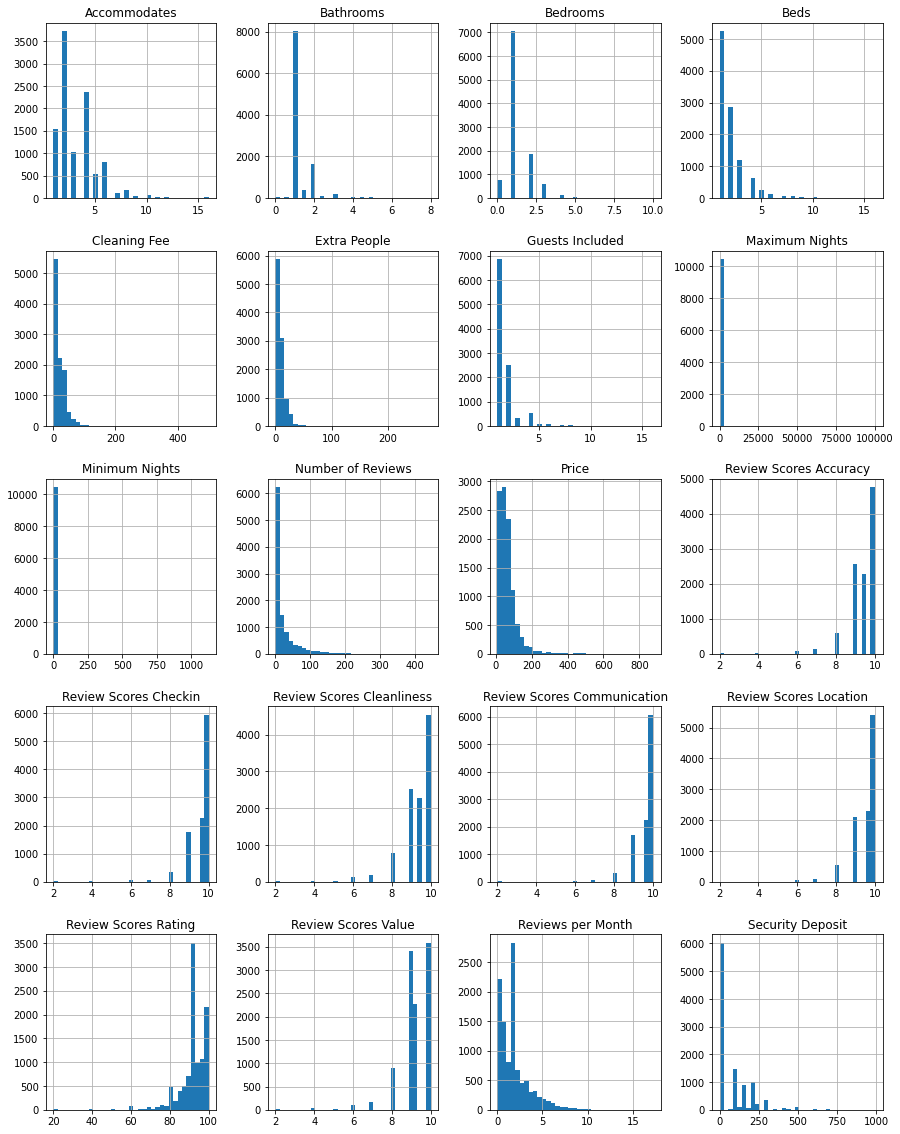

In [21]:
#Hemos eliminado los valores nulos de los datos. Vamos a analizar las distribuciones de las variables.

#También vemos outliers que pueden meter ruido en el modelo

import matplotlib.pyplot as plt
# import seaborn
import seaborn as sns
%matplotlib inline

#Vemos las distribuciones de las variables

df_seleccion.hist(bins=35, figsize=(15, 20))

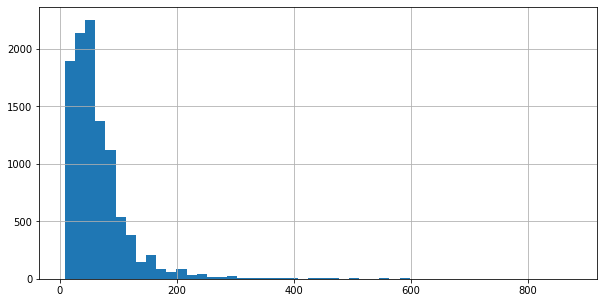

In [22]:
df_seleccion.Price.hist(bins=50, figsize=(10, 5))

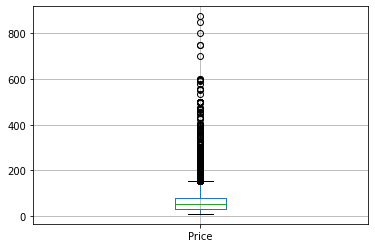

In [23]:
df_seleccion.boxplot(column = 'Price')

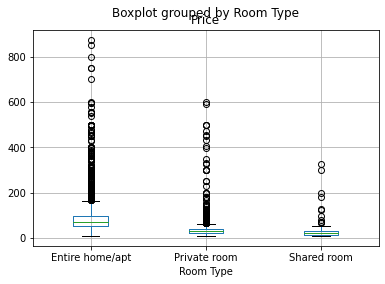

In [24]:
df_seleccion.boxplot(by='Room Type',column = 'Price')

In [25]:
#Vemos los rangos intercuantilicos para filtrar los outliers
#Los outlier los definimos como 1,5 veces el rango intercuantilico + el p75

p75=80
p25=31

iqr=p75-p25
outlier= p75 + 1.5*iqr
outlier



153.5

In [26]:
#Vamos a filtrar por el limite outlier

df_seleccion_outlier = df_seleccion[df_seleccion.Price <outlier]
df_seleccion_outlier.shape
df_seleccion_outlier.describe()

Accommodates    Bathrooms     Bedrooms         Beds        Price  \
count   9972.000000  9972.000000  9972.000000  9972.000000  9972.000000   
mean       3.012435     1.206077     1.215203     1.854994    56.593963   
std        1.741621     0.535896     0.711819     1.300900    31.494313   
min        1.000000     0.000000     0.000000     1.000000     9.000000   
25%        2.000000     1.000000     1.000000     1.000000    30.000000   
50%        2.000000     1.000000     1.000000     1.000000    50.000000   
75%        4.000000     1.000000     1.000000     2.000000    75.000000   
max       16.000000     8.000000    10.000000    16.000000   153.000000   

       Security Deposit  Cleaning Fee  Guests Included  Extra People  \
count       9972.000000   9972.000000      9972.000000   9972.000000   
mean          73.088147     15.385981         1.513939      7.287304   
std          106.665552     17.954587         0.945144     10.282607   
min            0.000000      0.000000         1.000000      0.000000   
25%            0.000000      0.000000         1.000000      0.000000   
50%            0.000000     10.000000         1.000000      0.000000   
75%          150.000000     25.000000         2.000000     13.000000   
max          990.000000    200.000000        16.000000    276.000000   

       Minimum Nights  Maximum Nights  Number of Reviews  \
count     9972.000000     9972.000000        9972.000000   
mean         2.925291      866.977136          23.516346   
std         13.784286     1543.453313          38.637587   
min          1.000000        1.000000           0.000000   
25%          1.000000      365.000000           1.000000   
50%          2.000000     1125.000000           8.000000   
75%          3.000000     1125.000000          29.000000   
max       1125.000000    99999.000000         446.000000   

       Review Scores Rating  Review Scores Accuracy  \
count           9972.000000             9972.000000   
mean              91.573112                9.405968   
std                7.980991                0.815785   
min               20.000000                2.000000   
25%               90.000000                9.000000   
50%               91.624317                9.410319   
75%               97.000000               10.000000   
max              100.000000               10.000000   

       Review Scores Cleanliness  Review Scores Checkin  \
count                9972.000000            9972.000000   
mean                    9.315591               9.623812   
std                     0.896788               0.695142   
min                     2.000000               2.000000   
25%                     9.000000               9.619808   
50%                     9.323200              10.000000   
75%                    10.000000              10.000000   
max                    10.000000              10.000000   

       Review Scores Communication  Review Scores Location  \
count                  9972.000000             9972.000000   
mean                      9.649330                9.536697   
std                       0.662235                0.682507   
min                       2.000000                2.000000   
25%                       9.646723                9.000000   
50%                      10.000000               10.000000   
75%                      10.000000               10.000000   
max                      10.000000               10.000000   

       Review Scores Value  Reviews per Month  
count          9972.000000        9972.000000  
mean              9.211532           1.959357  
std               0.842843           1.718036  
min               2.000000           0.020000  
25%               9.000000           0.650000  
50%               9.212380           1.937502  
75%              10.000000           2.410000  
max              10.000000          17.210000

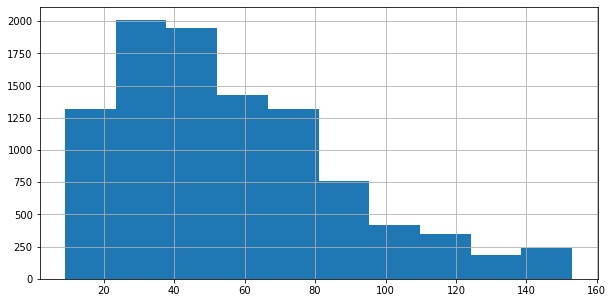

In [27]:
#Vemos la nueva distribución de precios
df_seleccion_outlier.Price.hist(bins=10, figsize=(10, 5))

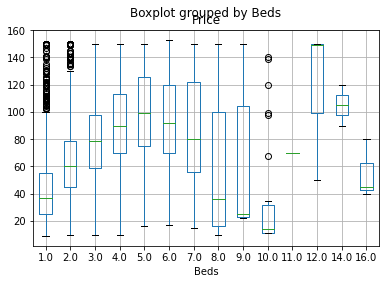

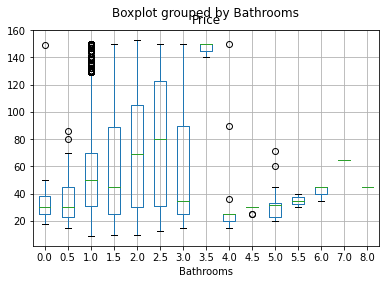

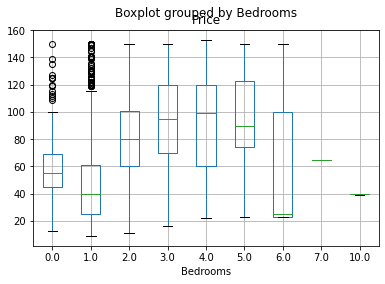

In [28]:
#df_seleccion_600.boxplot(by='Neighbourhood Cleansed',column = 'Price')
df_seleccion_outlier.boxplot(by='Beds',column = 'Price')
df_seleccion_outlier.boxplot(by='Bathrooms',column = 'Price')
df_seleccion_outlier.boxplot(by='Bedrooms',column = 'Price')


In [29]:
#Vamos a quedarnos con este limite de precios. Otra opción podría ser realizar la transformada del precio
#y convertir a logaritmo. Podemos probarlo según los resultados de los modelos

## Analizamos las variables categoricas

In [30]:
#Análisis de variables categóricas. Vemos distribuciones y nulos.
#tenemos que ver si existen valores nulos, para dejar los datos limpios y después poder codificarlos correctamente.
df_seleccion_outlier.select_dtypes(include='object').count()

Neighbourhood                   6563
Neighbourhood Cleansed          9972
Neighbourhood Group Cleansed    9972
Zipcode                         9652
Property Type                   9972
Room Type                       9972
Bed Type                        9972
Amenities                       9920
First Review                    7974
Last Review                     7973
Cancellation Policy             9972
dtype: int64

In [31]:
#Analizando las variables categoricas y la información que contienen, vemos que hay 3 que cuentan con valores nulos en alto %.
#Además la variable Neighbourhood, tiene la misma información que otras 2 variables de neighbourhood por lo que 
#la vamos a eliminar tambien. Por otro lado last review y first review no aportan nada por lo que se van fuera tambien.


df_seleccion_outlier.drop(['Neighbourhood','First Review','Last Review'],axis=1,inplace=True)
df_seleccion_outlier.select_dtypes(include='object').count()

C:\Users\josu.lazaro\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Neighbourhood Cleansed          9972
Neighbourhood Group Cleansed    9972
Zipcode                         9652
Property Type                   9972
Room Type                       9972
Bed Type                        9972
Amenities                       9920
Cancellation Policy             9972
dtype: int64

In [32]:
#Vamos a analizar las variables neighbourhood para elegir cual de las 2 metemos al modelo.

df_seleccion_outlier['Neighbourhood Cleansed'].value_counts()

Embajadores       1385
Universidad       1047
Palacio            801
Sol                688
Justicia           590
                  ... 
El Goloso            2
El Plantío           2
Orcasitas            2
Cuatro Vientos       2
Fuentelareina        2
Name: Neighbourhood Cleansed, Length: 125, dtype: int64

In [33]:
df_seleccion_outlier['Neighbourhood Group Cleansed'].value_counts()

Centro                   5081
Chamberí                  719
Arganzuela                630
Salamanca                 611
Tetuán                    358
Moncloa - Aravaca         319
Retiro                    316
Latina                    299
Carabanchel               281
Chamartín                 262
Ciudad Lineal             239
Puente de Vallecas        161
Hortaleza                 139
Fuencarral - El Pardo     121
Usera                     117
San Blas - Canillejas      88
Villaverde                 61
Barajas                    58
Moratalaz                  53
Villa de Vallecas          34
Vicálvaro                  25
Name: Neighbourhood Group Cleansed, dtype: int64

In [34]:
#Analizando las distribuciones y los valores, nos vamos a quedar con Neighbourhood Cleansed ya que proporciona mayor granularidad
#en el dato, aportandonos información a mayor nivel. Por ejemplo dentro del grupo centro tenemos embajadores, sol, latina etc. Lo mismo con codigo postal.

df_seleccion_outlier.drop(['Neighbourhood Group Cleansed','Zipcode'],axis=1,inplace=True)

In [35]:
df_seleccion_outlier.select_dtypes(include='object').count()

Neighbourhood Cleansed    9972
Property Type             9972
Room Type                 9972
Bed Type                  9972
Amenities                 9920
Cancellation Policy       9972
dtype: int64

In [36]:
#Vemos la distribución del resto de variables categoricas

df_seleccion_outlier['Property Type'].value_counts()

Apartment             8237
House                  724
Bed & Breakfast        265
Condominium            255
Loft                   194
Other                  165
Dorm                    34
Guesthouse              34
Chalet                  16
Hostel                  13
Serviced apartment      12
Townhouse                6
Boutique hotel           4
Casa particular          3
Earth House              2
Guest suite              2
Villa                    2
Timeshare                1
Bungalow                 1
Tent                     1
Camper/RV                1
Name: Property Type, dtype: int64

In [37]:
df_seleccion_outlier['Room Type'].value_counts()

Entire home/apt    5787
Private room       4042
Shared room         143
Name: Room Type, dtype: int64

In [38]:
df_seleccion_outlier['Bed Type'].value_counts()

Real Bed         9740
Pull-out Sofa     188
Futon              26
Couch              13
Airbed              5
Name: Bed Type, dtype: int64

In [39]:
df_seleccion_outlier['Cancellation Policy'].value_counts()


strict             3626
flexible           3279
moderate           3063
super_strict_30       2
super_strict_60       2
Name: Cancellation Policy, dtype: int64

In [40]:
#Analizamos la variable amenities que contiene texto y la vamos a transformar para que nos aporte el numero de amenities
#que contiene cada apartamento y nos de mayor valor al modelo.

df_seleccion_outlier.dropna(subset=['Amenities'],inplace=True)
df_seleccion_outlier['num_amenities']  = df_seleccion_outlier['Amenities'].str.split(',')
df_seleccion_outlier['Caracteristicas']  = df_seleccion_outlier.num_amenities.str.len()
df_seleccion_outlier['Caracteristicas'].describe()

C:\Users\josu.lazaro\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\josu.lazaro\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\josu.lazaro\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

count    9920.000000
mean       14.352621
std         4.548742
min         1.000000
25%        11.000000
50%        14.000000
75%        17.000000
max        34.000000
Name: Caracteristicas, dtype: float64

In [41]:
df_seleccion_outlier.columns

Index(['Neighbourhood Cleansed', 'Property Type', 'Room Type', 'Accommodates',
       'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type', 'Amenities', 'Price',
       'Security Deposit', 'Cleaning Fee', 'Guests Included', 'Extra People',
       'Minimum Nights', 'Maximum Nights', 'Number of Reviews',
       'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'Cancellation Policy', 'Reviews per Month',
       'num_amenities', 'Caracteristicas'],
      dtype='object')

In [42]:
#Se crea la variable amenities y veremos que aporta al modelo de predicción.
df_seleccion_outlier.drop(['num_amenities','Amenities'],axis=1,inplace=True) 
df_seleccion_outlier.dtypes

Neighbourhood Cleansed          object
Property Type                   object
Room Type                       object
Accommodates                     int64
Bathrooms                      float64
Bedrooms                       float64
Beds                           float64
Bed Type                        object
Price                          float64
Security Deposit               float64
Cleaning Fee                   float64
Guests Included                  int64
Extra People                     int64
Minimum Nights                   int64
Maximum Nights                   int64
Number of Reviews                int64
Review Scores Rating           float64
Review Scores Accuracy         float64
Review Scores Cleanliness      float64
Review Scores Checkin          float64
Review Scores Communication    float64
Review Scores Location         float64
Review Scores Value            float64
Cancellation Policy             object
Reviews per Month              float64
Caracteristicas          

## Analisis correlaciones

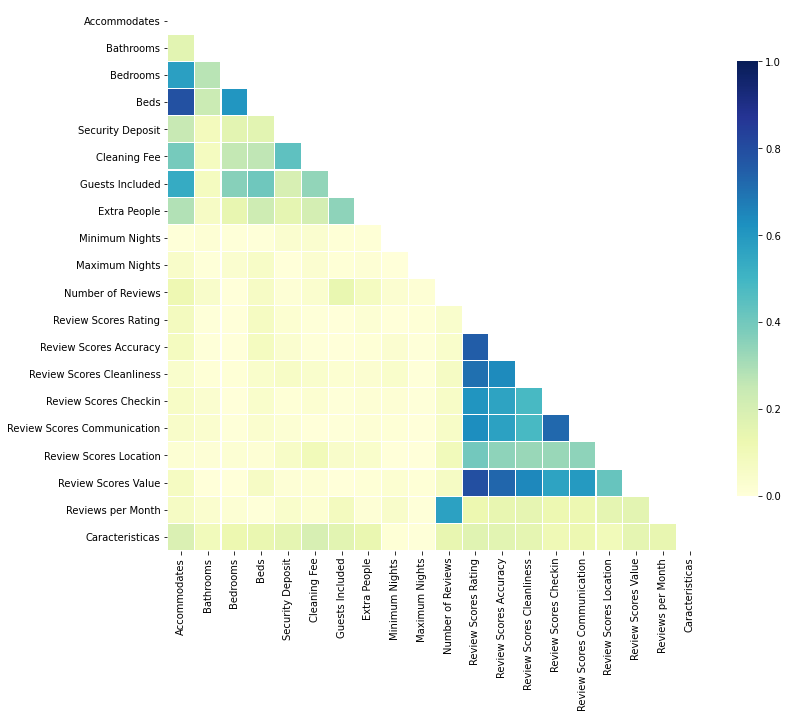

In [43]:
#Analizamos correlaciones entre variables
import seaborn as sns
import numpy as np
# Compute the correlation matrix
corr = np.abs(df_seleccion_outlier.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

In [44]:
df_seleccion_outlier.corr()

Accommodates  Bathrooms  Bedrooms      Beds  \
Accommodates                     1.000000   0.160858  0.577353  0.785655   
Bathrooms                        0.160858   1.000000  0.274395  0.236343   
Bedrooms                         0.577353   0.274395  1.000000  0.608056   
Beds                             0.785655   0.236343  0.608056  1.000000   
Price                            0.586281   0.097355  0.398722  0.404217   
Security Deposit                 0.247209   0.088661  0.156783  0.160372   
Cleaning Fee                     0.391913   0.082015  0.256580  0.262849   
Guests Included                  0.538378   0.081848  0.362542  0.408202   
Extra People                     0.288464   0.063667  0.141578  0.226729   
Minimum Nights                   0.004164   0.019115  0.006640 -0.006009   
Maximum Nights                   0.053370   0.007066  0.031595  0.055100   
Number of Reviews                0.118381  -0.049731 -0.003820  0.064360   
Review Scores Rating            -0.084057  -0.005450 -0.000512 -0.072689   
Review Scores Accuracy          -0.078801  -0.004785 -0.003885 -0.081940   
Review Scores Cleanliness       -0.041613  -0.007835 -0.009115 -0.043148   
Review Scores Checkin           -0.059849  -0.031653 -0.000412 -0.045222   
Review Scores Communication     -0.052487  -0.035365  0.006544 -0.036951   
Review Scores Location           0.021092   0.015024 -0.022401 -0.016975   
Review Scores Value             -0.073133  -0.003319 -0.001876 -0.065002   
Reviews per Month                0.069305  -0.038588 -0.022129  0.007783   
Caracteristicas                  0.187992   0.097010  0.128124  0.136505   

                                Price  Security Deposit  Cleaning Fee  \
Accommodates                 0.586281          0.247209      0.391913   
Bathrooms                    0.097355          0.088661      0.082015   
Bedrooms                     0.398722          0.156783      0.256580   
Beds                         0.404217          0.160372      0.262849   
Price                        1.000000          0.329729      0.489629   
Security Deposit             0.329729          1.000000      0.440417   
Cleaning Fee                 0.489629          0.440417      1.000000   
Guests Included              0.427126          0.198362      0.341124   
Extra People                 0.154267          0.153011      0.208698   
Minimum Nights              -0.001327          0.033255      0.034016   
Maximum Nights               0.027414          0.000134      0.029935   
Number of Reviews            0.035221          0.013389      0.037796   
Review Scores Rating         0.053948          0.026753     -0.006704   
Review Scores Accuracy       0.062260          0.034635      0.004834   
Review Scores Cleanliness    0.086165          0.060850      0.042515   
Review Scores Checkin        0.014889          0.008700     -0.024729   
Review Scores Communication  0.026423          0.022499     -0.002606   
Review Scores Location       0.157663          0.057149      0.099233   
Review Scores Value          0.032210          0.013191     -0.017994   
Reviews per Month           -0.012752         -0.045715     -0.025537   
Caracteristicas              0.240619          0.153466      0.197080   

                             Guests Included  Extra People  Minimum Nights  \
Accommodates                        0.538378      0.288464        0.004164   
Bathrooms                           0.081848      0.063667        0.019115   
Bedrooms                            0.362542      0.141578        0.006640   
Beds                                0.408202      0.226729       -0.006009   
Price                               0.427126      0.154267       -0.001327   
Security Deposit                    0.198362      0.153011        0.033255   
Cleaning Fee                        0.341124      0.208698        0.034016   
Guests Included                     1.000000      0.348092        0.009631   
Extra People                        0.348092   

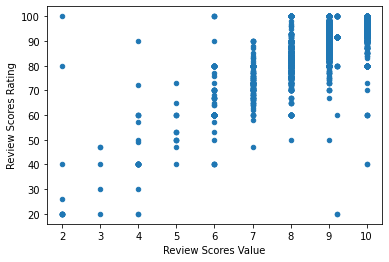

In [45]:
# Vemos algunos casos concretos de correlaciones
df_seleccion_outlier.plot(kind = 'scatter',x='Review Scores Value',y = 'Review Scores Rating')
plt.xlabel('Review Scores Value')
plt.ylabel('Review Scores Rating')
plt.show()

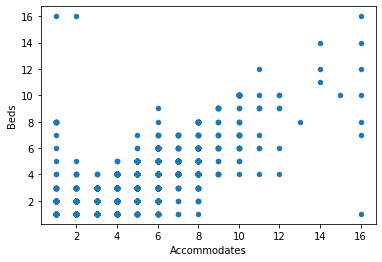

In [46]:
df_seleccion_outlier.plot(kind = 'scatter',x='Accommodates',y = 'Beds')
plt.xlabel('Accommodates')
plt.ylabel('Beds')
plt.show()

In [47]:
#Viendo las correlaciones, puede tener sentido eliminar una de las variables entre beds y accommodates ya que estan muy correlacionadas

#Aunque hay datos un tanto raros de accomodates respecto a beds, vamos a mantenerla en el modelo. Aplicamos el algoritmo de seleccion de caracteristicas.




##  Codificación de variables categóricas

In [48]:
#Codificación variables categóricas, Mean Encoder

#Cogemos las variables categoricas a codificar
df_seleccion_outlier.select_dtypes(include='object').count()


Neighbourhood Cleansed    9920
Property Type             9920
Room Type                 9920
Bed Type                  9920
Cancellation Policy       9920
dtype: int64

In [49]:
categorical = ['Neighbourhood Cleansed', 'Property Type', 'Room Type','Bed Type','Cancellation Policy']
# En train creamos un dict para usarlo después en test
# ESTO ES EN TRAIN.CSV!

mean_map = {}
for c in categorical:
    mean = df_seleccion_outlier.groupby(c)['Price'].mean()
    df_seleccion_outlier[c] = df_seleccion_outlier[c].map(mean)    
    mean_map[c] = mean
# Luego, en test, categorizamos con los datos de train!
# ESTO ES EN TEST.CSV!
#for c in categorical:
 #   df_test[c] = df_test[c].map(mean_map[c])

C:\Users\josu.lazaro\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [50]:
#Hemos aplicado la codificación
df_seleccion_outlier.head()

Neighbourhood Cleansed  Property Type  Room Type  Accommodates  Bathrooms  \
0               54.981187      58.360054  74.480423             4        1.0   
1               32.531250      46.437326  32.128960             1        1.0   
2               70.089474      58.360054  74.480423             4        1.0   
3               73.311953      58.360054  74.480423             2        1.0   
5               48.359606      58.360054  32.128960             2        1.0   

   Bedrooms  Beds   Bed Type  Price  Security Deposit  Cleaning Fee  \
0       1.0   1.0  56.763212   55.0               0.0           0.0   
1       1.0   1.0  56.763212   21.0               0.0           0.0   
2       2.0   4.0  56.763212  110.0             175.0          50.0   
3       0.0   1.0  56.763212   39.0               0.0           0.0   
5       1.0   1.0  56.763212   65.0               0.0          10.0   

   Guests Included  Extra People  Minimum Nights  Maximum Nights  \
0                1             0               1            1125   
1                1             0               1            1125   
2                4            15               2            1125   
3                1             0               2             365   
5                1             0               1            1125   

   Number of Reviews  Review Scores Rating  Review Scores Accuracy  \
0                 72             88.000000                9.000000   
1                  0             91.624317                9.410319   
2                 58             93.000000                9.000000   
3                 11             87.000000                8.000000   
5                  0             91.624317                9.410319   

   Review Scores Cleanliness  Review Scores Checkin  \
0                     8.0000              10.000000   
1                     9.3232               9.619808   
2                    10.0000              10.000000   
3                     8.0000               9.000000   
5                     9.3232               9.619808   

   Review Scores Communication  Review Scores Location  Review Scores Value  \
0                    10.000000                9.000000              9.00000   
1                     9.646723                9.543926              9.21238   
2                    10.000000               10.000000              9.00000   
3                     9.000000               10.000000              9.00000   
5                     9.646723                9.543926              9.21238   

   Cancellation Policy  Reviews per Month  Caracteristicas  
0            49.631758           7.630000               18  
1            49.631758           1.937502               12  
2            58.006215           2.280000               18  
3            58.006215           2.970000               13  
5            49.631758           1.937502                8

In [51]:
df_seleccion_outlier.count()

Neighbourhood Cleansed         9920
Property Type                  9920
Room Type                      9920
Accommodates                   9920
Bathrooms                      9920
Bedrooms                       9920
Beds                           9920
Bed Type                       9920
Price                          9920
Security Deposit               9920
Cleaning Fee                   9920
Guests Included                9920
Extra People                   9920
Minimum Nights                 9920
Maximum Nights                 9920
Number of Reviews              9920
Review Scores Rating           9920
Review Scores Accuracy         9920
Review Scores Cleanliness      9920
Review Scores Checkin          9920
Review Scores Communication    9920
Review Scores Location         9920
Review Scores Value            9920
Cancellation Policy            9920
Reviews per Month              9920
Caracteristicas                9920
dtype: int64

## Selección de variables

### Metodo Lasso para eliminación de variables

In [52]:
df_seleccion_outlier.head()

Neighbourhood Cleansed  Property Type  Room Type  Accommodates  Bathrooms  \
0               54.981187      58.360054  74.480423             4        1.0   
1               32.531250      46.437326  32.128960             1        1.0   
2               70.089474      58.360054  74.480423             4        1.0   
3               73.311953      58.360054  74.480423             2        1.0   
5               48.359606      58.360054  32.128960             2        1.0   

   Bedrooms  Beds   Bed Type  Price  Security Deposit  Cleaning Fee  \
0       1.0   1.0  56.763212   55.0               0.0           0.0   
1       1.0   1.0  56.763212   21.0               0.0           0.0   
2       2.0   4.0  56.763212  110.0             175.0          50.0   
3       0.0   1.0  56.763212   39.0               0.0           0.0   
5       1.0   1.0  56.763212   65.0               0.0          10.0   

   Guests Included  Extra People  Minimum Nights  Maximum Nights  \
0                1             0               1            1125   
1                1             0               1            1125   
2                4            15               2            1125   
3                1             0               2             365   
5                1             0               1            1125   

   Number of Reviews  Review Scores Rating  Review Scores Accuracy  \
0                 72             88.000000                9.000000   
1                  0             91.624317                9.410319   
2                 58             93.000000                9.000000   
3                 11             87.000000                8.000000   
5                  0             91.624317                9.410319   

   Review Scores Cleanliness  Review Scores Checkin  \
0                     8.0000              10.000000   
1                     9.3232               9.619808   
2                    10.0000              10.000000   
3                     8.0000               9.000000   
5                     9.3232               9.619808   

   Review Scores Communication  Review Scores Location  Review Scores Value  \
0                    10.000000                9.000000              9.00000   
1                     9.646723                9.543926              9.21238   
2                    10.000000               10.000000              9.00000   
3                     9.000000               10.000000              9.00000   
5                     9.646723                9.543926              9.21238   

   Cancellation Policy  Reviews per Month  Caracteristicas  
0            49.631758           7.630000               18  
1            49.631758           1.937502               12  
2            58.006215           2.280000               18  
3            58.006215           2.970000               13  
5            49.631758           1.937502                8

In [91]:
#Feature Engineering. Random Forest y Lasso
from sklearn import preprocessing

cols =list([ 'Price',
'Neighbourhood Cleansed',
'Property Type',
'Room Type',
'Accommodates',
'Bathrooms',
'Bedrooms',
'Beds',
'Bed Type',
'Security Deposit',
'Cleaning Fee',
'Guests Included',
'Extra People',
'Minimum Nights',
'Maximum Nights',
'Number of Reviews',
'Review Scores Rating',
'Review Scores Accuracy',
'Review Scores Cleanliness',
'Review Scores Checkin',
'Review Scores Communication',
'Review Scores Location',
'Review Scores Value',
'Cancellation Policy',
'Reviews per Month',
'Caracteristicas'])

df_seleccion_outlier2 = df_seleccion_outlier[cols]

# convertimos el DataFrame al formato necesario para scikit-learn
data = df_seleccion_outlier2.values

y = data[:,0:1]     # nos quedamos con la columna Price
X = data [:,1:]      # nos quedamos con el resto

#scaler = preprocessing.StandardScaler().fit(X)
#XtrainScaled = scaler.transform(X)

feature_names = df_seleccion_outlier2.columns[1:]
feature_names

Index(['Neighbourhood Cleansed', 'Property Type', 'Room Type', 'Accommodates',
       'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type', 'Security Deposit',
       'Cleaning Fee', 'Guests Included', 'Extra People', 'Minimum Nights',
       'Maximum Nights', 'Number of Reviews', 'Review Scores Rating',
       'Review Scores Accuracy', 'Review Scores Cleanliness',
       'Review Scores Checkin', 'Review Scores Communication',
       'Review Scores Location', 'Review Scores Value', 'Cancellation Policy',
       'Reviews per Month', 'Caracteristicas'],
      dtype='object')

best mean cross-validation score: -370.777
best parameters: {'alpha': 0.016237767391887217}


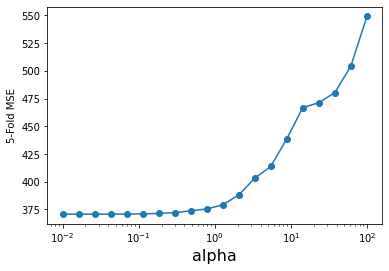

In [92]:
#Aplicamos modelo de Lasso para ver los coeficientes de las variables
from sklearn.metrics import mean_squared_error,SCORERS
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

alpha_vector = np.logspace(-2,2,20)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 10)
grid.fit(X, y)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')
plt.show()

In [93]:
from sklearn.metrics import mean_squared_error

alpha_optimo = grid.best_params_['alpha']
alpha_optimo=1
lasso = Lasso(alpha = alpha_optimo).fit(X,y)

ytrainLasso = lasso.predict(X)

mseTrainModelLasso = mean_squared_error(y,ytrainLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)


MSE Modelo Lasso (train): 375
RMSE Modelo Lasso (train): 19.4
Neighbourhood Cleansed 0.5651673807316719
Property Type -0.03941039448642572
Room Type 0.6273275374790994
Accommodates 3.4127034735291106
Bathrooms 0.0
Bedrooms 4.878611791701826
Beds 0.0
Bed Type 0.0
Security Deposit 0.012443082238137703
Cleaning Fee 0.19001073178476396
Guests Included 1.1521703661597587
Extra People -0.07929725084953528
Minimum Nights -0.039792607277383235
Maximum Nights 1.7087322525511694e-05
Number of Reviews -0.05834009652852424
Review Scores Rating 0.2705134363031819
Review Scores Accuracy 0.0
Review Scores Cleanliness 0.0
Review Scores Checkin -0.0
Review Scores Communication -0.0
Review Scores Location 0.0
Review Scores Value 0.0
Cancellation Policy -0.1986765210910787
Reviews per Month -0.7872676633210532
Caracteristicas 0.39949122448101


### Metodo Random Forest para eliminación de variables

Fitting 10 folds for each of 14 candidates, totalling 140 fits


C:\Users\josu.lazaro\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed: 11.6min finished
C:\Users\josu.lazaro\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


best mean cross-validation score: 0.147
best parameters: {'max_depth': 14}


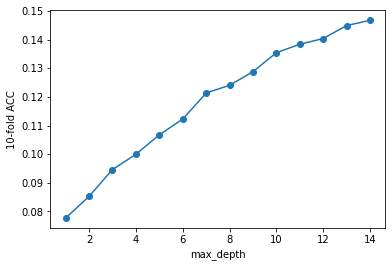

In [94]:
#Selecccion y evaluación modelos. Algoritmos regresión y grid search

from sklearn.ensemble import RandomForestClassifier

# grid search
maxDepth = range(1,15)
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestClassifier(random_state=0, n_estimators=200, max_features='sqrt'), param_grid=tuned_parameters,cv=10,verbose=1) 
grid.fit(X, np.ravel(y))

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()


In [95]:
maxDepthOptimo = grid.best_params_['max_depth']
bagModel = RandomForestClassifier(max_depth=maxDepthOptimo,n_estimators=200,max_features='sqrt').fit(X,np.ravel(y))

print("Train: ",bagModel.score(X,y))
#print("Test: ",bagModel.score(X_test,y_test))

Train:  0.8866935483870968


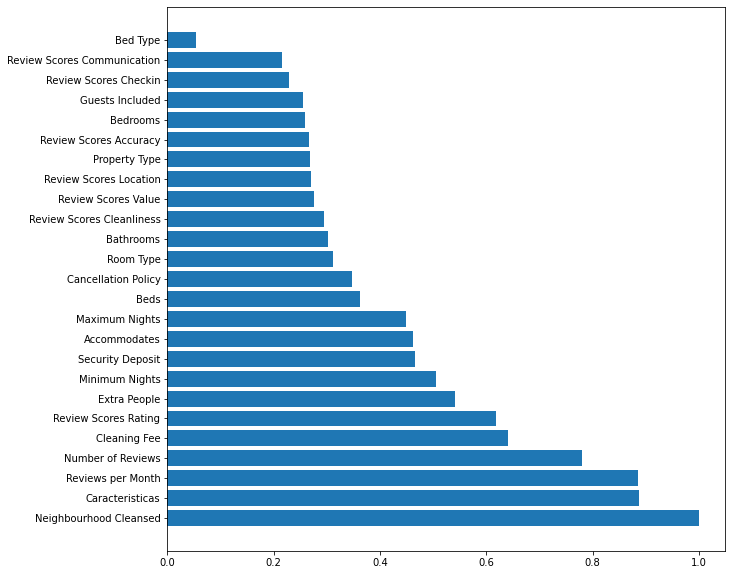

In [96]:
#Evaluamos la importancia de variables del random forest

importances = bagModel.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X.shape[1]),importances[indices])
plt.yticks(range(X.shape[1]),feature_names[indices])
plt.show()

In [59]:
#Utilizando este ranking, podemos hacer selección de características
from sklearn.model_selection import KFold

N,Nfeatures = X.shape

rf = RandomForestClassifier(max_depth=maxDepthOptimo,n_estimators=200,max_features='sqrt')
kf  = KFold(n_splits=10, shuffle = True, random_state=1)
cv_error = []
cv_std = []

for nfeatures in range(Nfeatures,0,-1):
        
    error_i = []
    
    for idxTrain, idxVal in kf.split(X):
        
        Xt = X[idxTrain,:]
        yt = y[idxTrain]
        Xv = X[idxVal,:]
        yv = y[idxVal]
        
        rf.fit(Xt,np.ravel(yt))
        
        ranking = rf.feature_importances_
        indices = np.argsort(ranking)[::-1] 
    
        selected = indices[0:(Nfeatures-nfeatures+1)]
        
        Xs = Xt[:,selected]
        
        rf.fit(Xs,np.ravel(yt))
        error = (1.0-rf.score(Xv[:,selected],yv))     
        error_i.append(error) 
    
    cv_error.append(np.mean(error_i))
    cv_std.append(np.std(error_i))
    
    print('# features ' + str(len(selected)) + ' error ' + str(np.mean(error_i)) + ' +/- ' + str(np.std(error_i)))

# features 1 error 0.9425403225806452 +/- 0.00589523851500542
# features 2 error 0.9490927419354838 +/- 0.005300732590780188
# features 3 error 0.9433467741935484 +/- 0.0046151302992982314
# features 4 error 0.916733870967742 +/- 0.007478724593141704
# features 5 error 0.9111895161290322 +/- 0.008629997873316326
# features 6 error 0.903125 +/- 0.005323687873593099
# features 7 error 0.8963709677419354 +/- 0.009987472642339386
# features 8 error 0.8797379032258066 +/- 0.010408479699831778
# features 9 error 0.873891129032258 +/- 0.014955071132409967
# features 10 error 0.872782258064516 +/- 0.01261330025775568
# features 11 error 0.869758064516129 +/- 0.011022529784545678
# features 12 error 0.8613911290322582 +/- 0.016748742420214378
# features 13 error 0.8618951612903224 +/- 0.01052450252914369
# features 14 error 0.8550403225806452 +/- 0.008527534670385733
# features 15 error 0.8543346774193548 +/- 0.009131195066094446
# features 16 error 0.8569556451612902 +/- 0.009819707489375605
#

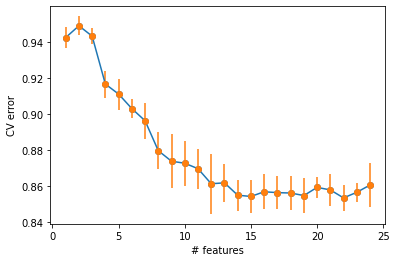

In [60]:
#Vemos como se comporta el modelo por num de variables para poder seleccionar 1 numero
plt.plot(range(1,Nfeatures+1,1),cv_error,'-o')
plt.errorbar(range(1,Nfeatures+1,1), cv_error, yerr=cv_std, fmt='o')
plt.xlabel('# features')
plt.ylabel('CV error')
plt.show()

In [161]:
feature_names

Index(['Neighbourhood Cleansed', 'Property Type', 'Room Type', 'Accommodates',
       'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type', 'Security Deposit',
       'Cleaning Fee', 'Guests Included', 'Extra People', 'Minimum Nights',
       'Maximum Nights', 'Number of Reviews', 'Review Scores Rating',
       'Review Scores Accuracy', 'Review Scores Cleanliness',
       'Review Scores Checkin', 'Review Scores Communication',
       'Review Scores Location', 'Review Scores Value', 'Cancellation Policy',
       'Reviews per Month', 'Caracteristicas'],
      dtype='object')

In [ ]:
#Podemos ver, que el error minimo es con 15 variables. A partir de ahi se estabiliza o crece.
#Vamos a seleccionar las 15 variables más importantes según el algoritmo y probamos para ver que todas son importantes.

#Vamos a pasar el dataset de 24 a 15 variables, eliminamos 9 variables.

    'Neighbourhood Cleansed', 'Property Type', 'Room Type', 'Accommodates',
       'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type', 'Security Deposit',
       'Cleaning Fee', 'Guests Included', 'Extra People', 'Minimum Nights',
       'Maximum Nights', 'Number of Reviews', 'Review Scores Rating',
       'Review Scores Accuracy', 'Review Scores Cleanliness',
       'Review Scores Checkin', 'Review Scores Communication',
       'Review Scores Location', 'Review Scores Value', 'Cancellation Policy',
       'Reviews per Month', 'Caracteristicas'
    
#-ELiminamos las siguientes:
    
'Bed Type'
'Review Scores Communication'
'Review Scores Checkin'
'Guests Included'
'Review Scores Accuracy'
'Review Scores Location'
'Bedrooms'
'Property Type'
'Review Scores Value'
'Review Scores Cleanliness'    


In [174]:
#Creamos lista con las variables seleccionadas
variables_modelo = ['Price','Neighbourhood Cleansed', 'Room Type', 'Accommodates',
       'Bathrooms', 'Beds', 'Security Deposit',
       'Cleaning Fee', 'Extra People', 'Minimum Nights',
       'Maximum Nights', 'Number of Reviews', 'Review Scores Rating',
       'Cancellation Policy','Reviews per Month', 'Caracteristicas']


# Cargamos datos de test 

In [132]:
#Cargamos el csv de datos de test
df_test = pd.read_csv('./test.csv',sep=';',decimal='.')
df_test.shape

(2642, 89)

In [135]:
#Seleccionamos las variables definidas en Train

variables_selec= ["Neighbourhood","Neighbourhood Cleansed","Neighbourhood Group Cleansed","Zipcode","Property Type","Room Type",
               "Accommodates","Bathrooms","Bedrooms","Beds","Bed Type","Amenities","Square Feet","Price","Weekly Price",
               "Monthly Price","Security Deposit","Cleaning Fee","Guests Included","Extra People","Minimum Nights",
               "Maximum Nights","Number of Reviews","First Review","Last Review","Review Scores Rating","Review Scores Accuracy",
               "Review Scores Cleanliness","Review Scores Checkin","Review Scores Communication","Review Scores Location",
               "Review Scores Value","Cancellation Policy","Reviews per Month"]

df_seleccion_test = df_test.loc[:,variables_selec]
df_seleccion_test.shape
df_seleccion.count()

Neighbourhood                    6941
Neighbourhood Cleansed          10487
Neighbourhood Group Cleansed    10487
Zipcode                         10146
Property Type                   10487
Room Type                       10487
Accommodates                    10487
Bathrooms                       10487
Bedrooms                        10487
Beds                            10487
Bed Type                        10487
Amenities                       10427
Price                           10487
Security Deposit                10487
Cleaning Fee                    10487
Guests Included                 10487
Extra People                    10487
Minimum Nights                  10487
Maximum Nights                  10487
Number of Reviews               10487
First Review                     8334
Last Review                      8333
Review Scores Rating            10487
Review Scores Accuracy          10487
Review Scores Cleanliness       10487
Review Scores Checkin           10487
Review Score

In [136]:
#Quitamos los datos de NAs de las variables
df_seleccion_test.dropna(subset=['Price'],inplace=True)
df_seleccion_test.dropna(subset=['Bathrooms'],inplace=True)
df_seleccion_test.dropna(subset=['Bedrooms'],inplace=True)
df_seleccion_test.dropna(subset=['Beds'],inplace=True)

In [137]:
#Creamos la variable características
df_seleccion_test.dropna(subset=['Amenities'],inplace=True)
df_seleccion_test['num_amenities']  = df_seleccion_test['Amenities'].str.split(',')
df_seleccion_test['Caracteristicas']  = df_seleccion_test.num_amenities.str.len()
df_seleccion_test.drop(['num_amenities','Amenities'],axis=1,inplace=True) 
df_seleccion_test['Caracteristicas'].describe()

count    2605.000000
mean       14.343954
std         4.605139
min         1.000000
25%        11.000000
50%        14.000000
75%        17.000000
max        31.000000
Name: Caracteristicas, dtype: float64

In [141]:
df_seleccion_test.drop(['Square Feet','Weekly Price','Monthly Price'],axis=1,inplace=True)    
df_seleccion_test.drop(['Neighbourhood','First Review','Last Review'],axis=1,inplace=True)
df_seleccion_test.drop(['Neighbourhood Group Cleansed','Zipcode'],axis=1,inplace=True)


KeyError: "['Square Feet' 'Weekly Price' 'Monthly Price'] not found in axis"

In [143]:
#Aplicamos el fill rellenando con 0s.

df_seleccion_test['Security Deposit'].fillna(0, inplace=True)
df_seleccion_test['Cleaning Fee'].fillna(0, inplace=True)

In [144]:
#Filtrado del precio por el outlier de train
df_seleccion_test = df_seleccion_test[df_seleccion_test.Price <outlier]
df_seleccion_test.describe()


Accommodates    Bathrooms     Bedrooms         Beds        Price  \
count   2469.000000  2469.000000  2469.000000  2469.000000  2469.000000   
mean       3.038882     1.200486     1.213852     1.877683    57.570271   
std        1.735121     0.514482     0.682345     1.334777    32.340026   
min        1.000000     0.000000     0.000000     1.000000    10.000000   
25%        2.000000     1.000000     1.000000     1.000000    30.000000   
50%        2.000000     1.000000     1.000000     1.000000    50.000000   
75%        4.000000     1.000000     1.000000     2.000000    78.000000   
max       16.000000     8.000000     6.000000    16.000000   150.000000   

       Security Deposit  Cleaning Fee  Guests Included  Extra People  \
count       2469.000000   2469.000000      2469.000000   2469.000000   
mean          75.832321     15.456865         1.538680      7.317537   
std          109.465333     18.101155         0.955992      8.746128   
min            0.000000      0.000000         1.000000      0.000000   
25%            0.000000      0.000000         1.000000      0.000000   
50%            0.000000     10.000000         1.000000      5.000000   
75%          150.000000     25.000000         2.000000     12.000000   
max          900.000000    200.000000        12.000000     50.000000   

       Minimum Nights  Maximum Nights  Number of Reviews  \
count     2469.000000     2469.000000        2469.000000   
mean         2.948562     1352.528149          24.548805   
std          7.255649    20407.182001          39.961516   
min          1.000000        1.000000           0.000000   
25%          1.000000      365.000000           1.000000   
50%          2.000000     1125.000000           9.000000   
75%          3.000000     1125.000000          30.000000   
max        180.000000  1000000.000000         300.000000   

       Review Scores Rating  Review Scores Accuracy  \
count           1980.000000             1978.000000   
mean              91.625758                9.399899   
std                9.168836                0.959124   
min               20.000000                2.000000   
25%               89.000000                9.000000   
50%               94.000000               10.000000   
75%               97.000000               10.000000   
max              100.000000               10.000000   

       Review Scores Cleanliness  Review Scores Checkin  \
count                1978.000000            1976.000000   
mean                    9.342770               9.640688   
std                     0.974018               0.776519   
min                     2.000000               2.000000   
25%                     9.000000               9.000000   
50%                    10.000000              10.000000   
75%                    10.000000              10.000000   
max                    10.000000              10.000000   

       Review Scores Communication  Review Scores Location  \
count                  1978.000000             1976.000000   
mean                      9.645096                9.534919   
std                       0.778069                0.785821   
min                       2.000000                2.000000   
25%                       9.000000                9.000000   
50%                      10.000000               10.000000   
75%                      10.000000               10.000000   
max                      10.000000               10.000000   

       Review Scores Value  Reviews per Month  Caracteristicas  
count          1976.000000        1999.000000      2469.000000  
mean              9.222672           1.926068        14.232483  
std               0.964700           1.846162         4.590728  
min               2.000000           0.020000         1.000000  
25%               9.000000           0.500000        11.000000  
50%               9.000000           1.290000        14.000000  
75%              10.000000           2.920000        17.000000  
max              10.000000        

In [145]:
df_seleccion_test.count()

Neighbourhood Cleansed         2469
Property Type                  2469
Room Type                      2469
Accommodates                   2469
Bathrooms                      2469
Bedrooms                       2469
Beds                           2469
Bed Type                       2469
Price                          2469
Security Deposit               2469
Cleaning Fee                   2469
Guests Included                2469
Extra People                   2469
Minimum Nights                 2469
Maximum Nights                 2469
Number of Reviews              2469
Review Scores Rating           1980
Review Scores Accuracy         1978
Review Scores Cleanliness      1978
Review Scores Checkin          1976
Review Scores Communication    1978
Review Scores Location         1976
Review Scores Value            1976
Cancellation Policy            2469
Reviews per Month              1999
Caracteristicas                2469
dtype: int64

In [146]:
#Rellenamos los datos de valoraciones, con los datos de train
map_of_values_reviews

    #Rellenamos en Test
for k, v in map_of_values_reviews.items():
    df_seleccion_test[k].fillna(v,inplace=True)

C:\Users\josu.lazaro\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [147]:
df_seleccion_test.count()

Neighbourhood Cleansed         2469
Property Type                  2469
Room Type                      2469
Accommodates                   2469
Bathrooms                      2469
Bedrooms                       2469
Beds                           2469
Bed Type                       2469
Price                          2469
Security Deposit               2469
Cleaning Fee                   2469
Guests Included                2469
Extra People                   2469
Minimum Nights                 2469
Maximum Nights                 2469
Number of Reviews              2469
Review Scores Rating           2469
Review Scores Accuracy         2469
Review Scores Cleanliness      2469
Review Scores Checkin          2469
Review Scores Communication    2469
Review Scores Location         2469
Review Scores Value            2469
Cancellation Policy            2469
Reviews per Month              2469
Caracteristicas                2469
dtype: int64

In [148]:
#Codificamos las variables categoricas con el encoder de train

for c in categorical:
    df_seleccion_test[c] = df_seleccion_test[c].map(mean_map[c])

df_seleccion_test.head()

C:\Users\josu.lazaro\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Neighbourhood Cleansed  Property Type  Room Type  Accommodates  Bathrooms  \
1               54.981187      58.360054  32.128960             2        1.0   
2               54.981187      58.360054  74.480423             4        1.0   
3               73.311953      58.360054  74.480423             4        1.0   
4               47.419355      35.049808  32.128960             2        2.0   
5               64.092105      58.360054  74.480423             2        1.0   

   Bedrooms  Beds   Bed Type  Price  Security Deposit  Cleaning Fee  \
1       1.0   1.0  53.648936   40.0             100.0           0.0   
2       1.0   2.0  56.763212   55.0             100.0          25.0   
3       0.0   2.0  56.763212   65.0             100.0           0.0   
4       1.0   1.0  56.763212   15.0               0.0           0.0   
5       1.0   1.0  56.763212   66.0               0.0           0.0   

   Guests Included  Extra People  Minimum Nights  Maximum Nights  \
1                1            10               1            1125   
2                2             7               2            1125   
3                2            15               1            1125   
4                1            15               1               7   
5                2            50               1            1125   

   Number of Reviews  Review Scores Rating  Review Scores Accuracy  \
1                  0             91.624317                9.410319   
2                 12             93.000000               10.000000   
3                 87             84.000000                9.000000   
4                  3             93.000000               10.000000   
5                  0             91.624317                9.410319   

   Review Scores Cleanliness  Review Scores Checkin  \
1                     9.3232               9.619808   
2                     9.0000              10.000000   
3                     9.0000               9.000000   
4                     9.0000              10.000000   
5                     9.3232               9.619808   

   Review Scores Communication  Review Scores Location  Review Scores Value  \
1                     9.646723                9.543926              9.21238   
2                     9.000000               10.000000              9.00000   
3                     9.000000               10.000000              9.00000   
4                    10.000000                8.000000              9.00000   
5                     9.646723                9.543926              9.21238   

   Cancellation Policy  Reviews per Month  Caracteristicas  
1            61.758421           1.937502               14  
2            61.758421           3.210000               13  
3            58.006215           3.090000               11  
4            58.006215           0.990000               12  
5            49.631758           1.937502               18

In [150]:
df_seleccion_test.describe()

Neighbourhood Cleansed  Property Type    Room Type  Accommodates  \
count             2469.000000    2469.000000  2469.000000   2469.000000   
mean                56.331348      56.758321    57.110466      3.038882   
std                 12.358072       5.365506    20.993689      1.735121   
min                 20.785714      19.500000    23.841727      1.000000   
25%                 48.359606      58.360054    32.128960      2.000000   
50%                 55.830769      58.360054    74.480423      2.000000   
75%                 65.036295      58.360054    74.480423      4.000000   
max                 78.592233     125.000000    74.480423     16.000000   

         Bathrooms     Bedrooms         Beds     Bed Type        Price  \
count  2469.000000  2469.000000  2469.000000  2469.000000  2469.000000   
mean      1.200486     1.213852     1.877683    56.651332    57.570271   
std       0.514482     0.682345     1.334777     0.938927    32.340026   
min       0.000000     0.000000     1.000000    43.500000    10.000000   
25%       1.000000     1.000000     1.000000    56.763212    30.000000   
50%       1.000000     1.000000     1.000000    56.763212    50.000000   
75%       1.000000     1.000000     2.000000    56.763212    78.000000   
max       8.000000     6.000000    16.000000    56.763212   150.000000   

       Security Deposit  Cleaning Fee  Guests Included  Extra People  \
count       2469.000000   2469.000000      2469.000000   2469.000000   
mean          75.832321     15.456865         1.538680      7.317537   
std          109.465333     18.101155         0.955992      8.746128   
min            0.000000      0.000000         1.000000      0.000000   
25%            0.000000      0.000000         1.000000      0.000000   
50%            0.000000     10.000000         1.000000      5.000000   
75%          150.000000     25.000000         2.000000     12.000000   
max          900.000000    200.000000        12.000000     50.000000   

       Minimum Nights  Maximum Nights  Number of Reviews  \
count     2469.000000     2469.000000        2469.000000   
mean         2.948562     1352.528149          24.548805   
std          7.255649    20407.182001          39.961516   
min          1.000000        1.000000           0.000000   
25%          1.000000      365.000000           1.000000   
50%          2.000000     1125.000000           9.000000   
75%          3.000000     1125.000000          30.000000   
max        180.000000  1000000.000000         300.000000   

       Review Scores Rating  Review Scores Accuracy  \
count           2469.000000             2469.000000   
mean              91.625472                9.401971   
std                8.210404                0.858441   
min               20.000000                2.000000   
25%               90.000000                9.000000   
50%               92.000000                9.410319   
75%               96.000000               10.000000   
max              100.000000               10.000000   

       Review Scores Cleanliness  Review Scores Checkin  \
count                2469.000000            2469.000000   
mean                    9.338879               9.636519   
std                     0.871797               0.694695   
min                     2.000000               2.000000   
25%                     9.000000               9.619808   
50%                     9.323200              10.000000   
75%                    10.000000              10.000000   
max                    10.000000              10.000000   

       Review Scores Communication  Review Scores Location  \
count                  2469.000000             2469.000000   
mean                      9.645420                9.536717   
std                       0.696384                0.702975   
min                       2.000000                2.000000   
25%                       9.646723                9.000000   
50%                      10.000000               10.000000   
75%         

# Preparamos los datos para ejecución en algoritmos

In [152]:
#Ponemos el precio en la primera posición
df_seleccion_test = df_seleccion_test[ ['Price'] + [ col for col in df_seleccion_test.columns if col != 'Price' ] ]

In [154]:
#Dividimos en train y test. Ya está dividido pero lo dejamos preparado

data_train = df_seleccion_outlier.values
data_test  = df_seleccion_test.values


In [170]:
#Creamos las variables train y test
y_Train = data_train[:,0:1]    
X_Train = data_train[:,1:]    

y_Test = data_test[:,0:1]     
X_Test = data_test[:,1:]      

In [157]:
#Almacenamos las columnas en 1 lista para posterior invocación
feature_names = df_seleccion_test.columns[1:] 

In [175]:
#Creamos otro conjunto de datos, eliminando las variables sugeridas por el algoritmo de selección de variables.
#De esta manera, podremos comparar los resultados de los modelos con las variables totales, y con la reducción

data_train_seleccion = df_seleccion_outlier.loc[:,variables_modelo].values
data_test_seleccion = df_seleccion_test.loc[:,variables_modelo].values

y_Train_seleccion = data_train_seleccion[:,0:1]    
X_Train_seleccion = data_train_seleccion[:,1:]    

y_Test_seleccion = data_test_seleccion[:,0:1]     
X_Test_seleccion = data_test_seleccion[:,1:]   

## Comparativa Resultados de Algoritmos


### Boosted Trees

In [218]:
from sklearn.ensemble import GradientBoostingRegressor

Niterations = [500,1500,2500,3500]
learningRate = [0.01,0.05]
# mantenemos max_depth estático: max_depth=3

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingRegressor(random_state=0, max_depth=4), param_grid=param_grid, cv = 5,verbose=1)
grid.fit(X_Train, np.ravel(y_Train))
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed: 16.0min finished


best mean cross-validation score: 0.432
best parameters: {'learning_rate': 0.01, 'n_estimators': 1500}


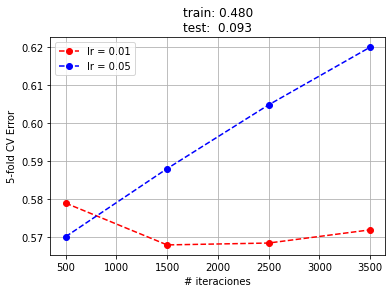

In [219]:
lrOptimo = grid.best_params_['learning_rate']
neOptimo = grid.best_params_['n_estimators']
bt = GradientBoostingRegressor(random_state=0, max_depth=4,learning_rate=lrOptimo, n_estimators=neOptimo)
bt.fit(X_Train,np.ravel(y_Train))

error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','b','g','k','m']
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(X_Train,y_Train),bt.score(X_Test,y_Test)))
plt.grid()
plt.show()

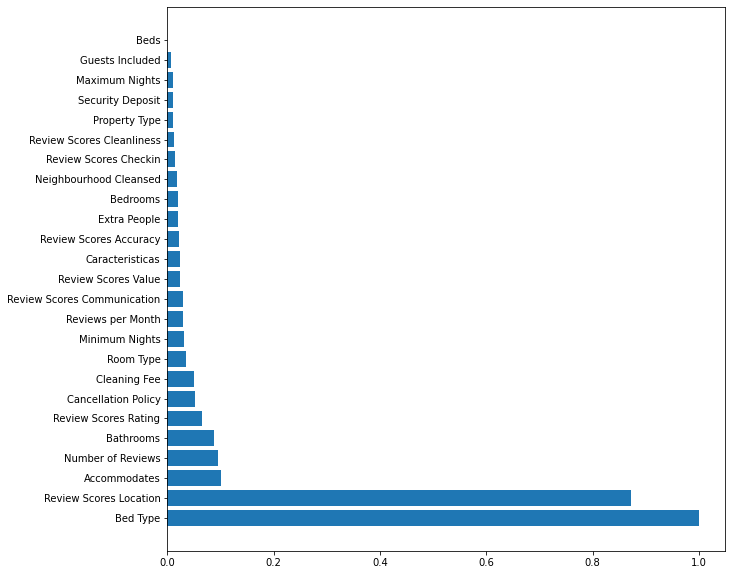

In [222]:
importances = bt.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_Train.shape[1]),importances[indices])
plt.yticks(range(X_Train.shape[1]),feature_names[indices])
plt.show()

## Boosted Trees, variables filtradas


In [223]:
from sklearn.ensemble import GradientBoostingRegressor

Niterations = [500,1500,2500,3500]
learningRate = [0.01,0.05]
# mantenemos max_depth estático: max_depth=4

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingRegressor(random_state=0, max_depth=4), param_grid=param_grid, cv = 5,verbose=2)
grid.fit(X_Train_seleccion, np.ravel(y_Train_seleccion))
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] learning_rate=0.01, n_estimators=500 ............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............. learning_rate=0.01, n_estimators=500, total=   4.9s
[CV] learning_rate=0.01, n_estimators=500 ............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s remaining:    0.0s


[CV] ............. learning_rate=0.01, n_estimators=500, total=   5.5s
[CV] learning_rate=0.01, n_estimators=500 ............................
[CV] ............. learning_rate=0.01, n_estimators=500, total=   5.0s
[CV] learning_rate=0.01, n_estimators=500 ............................
[CV] ............. learning_rate=0.01, n_estimators=500, total=   5.3s
[CV] learning_rate=0.01, n_estimators=500 ............................
[CV] ............. learning_rate=0.01, n_estimators=500, total=   5.2s
[CV] learning_rate=0.01, n_estimators=1500 ...........................
[CV] ............ learning_rate=0.01, n_estimators=1500, total=  12.6s
[CV] learning_rate=0.01, n_estimators=1500 ...........................
[CV] ............ learning_rate=0.01, n_estimators=1500, total=  12.6s
[CV] learning_rate=0.01, n_estimators=1500 ...........................
[CV] ............ learning_rate=0.01, n_estimators=1500, total=  12.0s
[CV] learning_rate=0.01, n_estimators=1500 ...........................
[CV] .

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed: 10.8min finished


best mean cross-validation score: 0.717
best parameters: {'learning_rate': 0.05, 'n_estimators': 500}


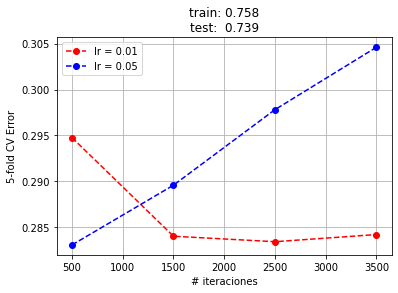

In [224]:
lrOptimo = grid.best_params_['learning_rate']
neOptimo = grid.best_params_['n_estimators']
bt = GradientBoostingRegressor(random_state=0, max_depth=3,learning_rate=lrOptimo, n_estimators=neOptimo)
bt.fit(X_Train_seleccion,np.ravel(y_Train_seleccion))

error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','b','g','k','m']
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(X_Train_seleccion,y_Train_seleccion),bt.score(X_Test_seleccion,y_Test_seleccion)))
plt.grid()
plt.show()

In [ ]:
El learning rate que mejor se comporta es 0.01. He probado con 0.001 pero el error es muy estable a pesar de que se aumente el numero de estimadores.

# Kernel SVR Regresión

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] C=0.01, gamma=1e-05 .............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, gamma=1e-05, total=   5.0s
[CV] C=0.01, gamma=1e-05 .............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.9s remaining:    0.0s


[CV] .............................. C=0.01, gamma=1e-05, total=   5.1s
[CV] C=0.01, gamma=1e-05 .............................................
[CV] .............................. C=0.01, gamma=1e-05, total=   4.7s
[CV] C=0.01, gamma=1e-05 .............................................
[CV] .............................. C=0.01, gamma=1e-05, total=   4.5s
[CV] C=0.01, gamma=1e-05 .............................................
[CV] .............................. C=0.01, gamma=1e-05, total=   4.8s
[CV] C=0.01, gamma=0.001 .............................................
[CV] .............................. C=0.01, gamma=0.001, total=   7.3s
[CV] C=0.01, gamma=0.001 .............................................
[CV] .............................. C=0.01, gamma=0.001, total=   7.8s
[CV] C=0.01, gamma=0.001 .............................................
[CV] .............................. C=0.01, gamma=0.001, total=   6.8s
[CV] C=0.01, gamma=0.001 .............................................
[CV] .

[CV] ................. C=0.3981071705534973, gamma=10.0, total=   9.2s
[CV] C=2.5118864315095824, gamma=1e-05 ...............................
[CV] ................ C=2.5118864315095824, gamma=1e-05, total=   5.4s
[CV] C=2.5118864315095824, gamma=1e-05 ...............................
[CV] ................ C=2.5118864315095824, gamma=1e-05, total=   4.8s
[CV] C=2.5118864315095824, gamma=1e-05 ...............................
[CV] ................ C=2.5118864315095824, gamma=1e-05, total=   5.2s
[CV] C=2.5118864315095824, gamma=1e-05 ...............................
[CV] ................ C=2.5118864315095824, gamma=1e-05, total=   5.1s
[CV] C=2.5118864315095824, gamma=1e-05 ...............................
[CV] ................ C=2.5118864315095824, gamma=1e-05, total=   4.7s
[CV] C=2.5118864315095824, gamma=0.001 ...............................
[CV] ................ C=2.5118864315095824, gamma=0.001, total=   7.5s
[CV] C=2.5118864315095824, gamma=0.001 ...............................
[CV] .

[CV] .............................. C=100.0, gamma=10.0, total=  28.1s
[CV] C=100.0, gamma=10.0 .............................................
[CV] .............................. C=100.0, gamma=10.0, total=  26.6s
[CV] C=100.0, gamma=10.0 .............................................
[CV] .............................. C=100.0, gamma=10.0, total=  28.0s


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed: 20.1min finished


best mean cross-validation score: 0.271
best parameters: {'C': 100.0, 'gamma': 1e-05}


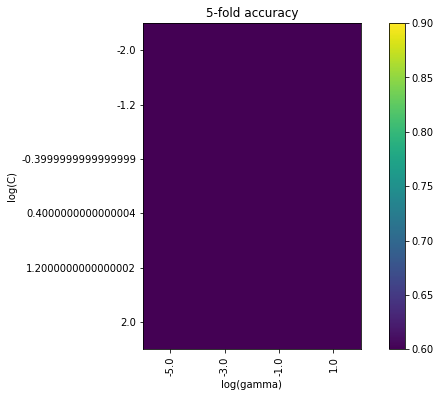

In [205]:
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score

# Paso 2:
vectorC = np.logspace(-2, 2, 6)
vectorG = np.logspace(-5, 1, 4)

param_grid = {'C': vectorC, 'gamma':vectorG}
grid = GridSearchCV(SVR(kernel='rbf'), param_grid=param_grid, cv = 5, verbose=2)
grid.fit(X_Train, np.ravel(y_Train))

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

# Mostramos prestaciones en CV
scores = grid.cv_results_['mean_test_score'].reshape(len(vectorC),len(vectorG))

plt.figure(figsize=(10,6))
plt.imshow(scores, interpolation='nearest', vmin= 0.6, vmax=0.9)
plt.xlabel('log(gamma)')
plt.ylabel('log(C)')
plt.colorbar()
plt.xticks(np.arange(len(vectorG)), np.log10(vectorG), rotation=90)
plt.yticks(np.arange(len(vectorC)), np.log10(vectorC))
plt.title('5-fold accuracy')
plt.show()

In [214]:
# Paso 3:
Copt = grid.best_params_['C']
Gopt = grid.best_params_['gamma']

svmModel = SVR(kernel='rbf',gamma = Gopt, C = Copt).fit(X_Train,y_Train)
print('Acc (TEST): %0.2f'%svmModel.score(X_Test,y_Test))

C:\Users\josu.lazaro\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Acc (TEST): -0.20


## SVR entrenado con datos con filtrado de variables

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] C=0.01, gamma=1e-05 .............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, gamma=1e-05, total=   4.3s
[CV] C=0.01, gamma=1e-05 .............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.2s remaining:    0.0s


[CV] .............................. C=0.01, gamma=1e-05, total=   4.2s
[CV] C=0.01, gamma=1e-05 .............................................
[CV] .............................. C=0.01, gamma=1e-05, total=   4.1s
[CV] C=0.01, gamma=1e-05 .............................................
[CV] .............................. C=0.01, gamma=1e-05, total=   3.7s
[CV] C=0.01, gamma=1e-05 .............................................
[CV] .............................. C=0.01, gamma=1e-05, total=   4.3s
[CV] C=0.01, gamma=0.001 .............................................
[CV] .............................. C=0.01, gamma=0.001, total=   6.7s
[CV] C=0.01, gamma=0.001 .............................................
[CV] .............................. C=0.01, gamma=0.001, total=   5.9s
[CV] C=0.01, gamma=0.001 .............................................
[CV] .............................. C=0.01, gamma=0.001, total=   5.9s
[CV] C=0.01, gamma=0.001 .............................................
[CV] .

[CV] ................. C=0.3981071705534973, gamma=10.0, total=   7.7s
[CV] C=2.5118864315095824, gamma=1e-05 ...............................
[CV] ................ C=2.5118864315095824, gamma=1e-05, total=   3.6s
[CV] C=2.5118864315095824, gamma=1e-05 ...............................
[CV] ................ C=2.5118864315095824, gamma=1e-05, total=   4.2s
[CV] C=2.5118864315095824, gamma=1e-05 ...............................
[CV] ................ C=2.5118864315095824, gamma=1e-05, total=   3.7s
[CV] C=2.5118864315095824, gamma=1e-05 ...............................
[CV] ................ C=2.5118864315095824, gamma=1e-05, total=   3.5s
[CV] C=2.5118864315095824, gamma=1e-05 ...............................
[CV] ................ C=2.5118864315095824, gamma=1e-05, total=   3.8s
[CV] C=2.5118864315095824, gamma=0.001 ...............................
[CV] ................ C=2.5118864315095824, gamma=0.001, total=   5.9s
[CV] C=2.5118864315095824, gamma=0.001 ...............................
[CV] .

[CV] .............................. C=100.0, gamma=10.0, total=  26.9s
[CV] C=100.0, gamma=10.0 .............................................
[CV] .............................. C=100.0, gamma=10.0, total=  25.9s
[CV] C=100.0, gamma=10.0 .............................................
[CV] .............................. C=100.0, gamma=10.0, total=  26.4s


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed: 16.5min finished


best mean cross-validation score: 0.591
best parameters: {'C': 100.0, 'gamma': 0.001}


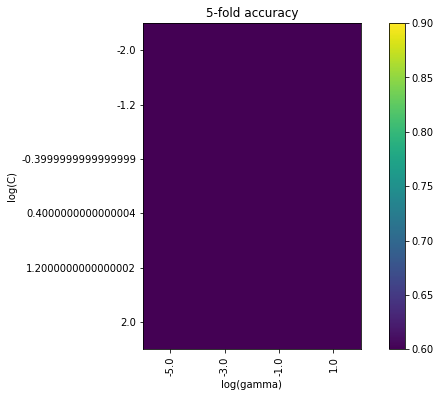

In [215]:
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score

# Paso 2:
vectorC = np.logspace(-2, 2, 6)
vectorG = np.logspace(-5, 1, 4)

param_grid = {'C': vectorC, 'gamma':vectorG}
grid = GridSearchCV(SVR(kernel='rbf'), param_grid=param_grid, cv = 5, verbose=2)
grid.fit(X_Train_seleccion, np.ravel(y_Train_seleccion))

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

# Mostramos prestaciones en CV
scores = grid.cv_results_['mean_test_score'].reshape(len(vectorC),len(vectorG))

plt.figure(figsize=(10,6))
plt.imshow(scores, interpolation='nearest', vmin= 0.6, vmax=0.9)
plt.xlabel('log(gamma)')
plt.ylabel('log(C)')
plt.colorbar()
plt.xticks(np.arange(len(vectorG)), np.log10(vectorG), rotation=90)
plt.yticks(np.arange(len(vectorC)), np.log10(vectorC))
plt.title('5-fold accuracy')
plt.show()

In [217]:
# Paso 3:
Copt = grid.best_params_['C']
Gopt = grid.best_params_['gamma']

svmModel = SVR(kernel='rbf',gamma = Gopt, C = Copt).fit(X_Train,np.ravel(y_Train))
print('Acc (TEST): %0.2f'%svmModel.score(X_Test,y_Test))

Acc (TEST): -0.00


Los datos de SVR no son muy buenos probandolos con dataset y dataset con variables seleccionadas. El algoritmo que mejor se comporta es el de Boosted Trees. En la parte de SVR faltaría probar con mas parametros pero los tiempos de ejecución no lo han permitido.